# Selección óptima de portafolios II

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

Entonces, tenemos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC.

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En la clase pasada aprendimos a hallar este portafolio óptimo si el conjunto de activos riesgosos estaba conformado únicamente por dos activos:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros, porque son una solución viable y escalable a más variables.
 

**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos cuando tenemos más de dos activos?
 - ¿Cómo construir la frontera de mínima varianza cuando tenemos más de dos activos?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos más de dos activos riesgosos?

En realidad es algo muy similar a lo que teníamos con dos activos.
- Para dos activos, construir la frontera de mínima varianza es trivial: todas las posibles combinaciones.
- Con más de dos activos, recordar la definición: la frontera de mínima varianza es el lugar geométrico de los portafolios que proveen el mínimo riesgo para un nivel de rendimiento dado.

<font color=blue> Ver en el tablero.</font>

Analíticamente:
- $n$ activos, 
- caracterizados por $(\sigma_i,E[r_i])$,
- cada uno con peso $w_i$, con $i=1,2,\dots,n$.

Entonces, buscamos los pesos tales que

\begin{align}
\min_{w_1,\dots,w_n} & \quad \sum_{i=1}^{n}w_i^2\sigma_i^2+\sum_{i=1}^{n}\sum_{j=1,j\neq i}^{n}w_iw_j\sigma_{ij}\\
\text{s.a.}          & \quad \sum_{i=1}^{n}w_i=1, w_i\geq0\\
                     & \quad \sum_{i=1}^{n}w_iE[r_i]=\bar{\mu},
\end{align}

donde $\bar{\mu}$ corresponde a un nivel de rendimiento objetivo. 

**Obviamente, tendríamos que resolver este problema para muchos niveles de rendimiento objetivo.**

- <font color=blue> Explicar relación con gráfica.</font>

- <font color=green> Recordar clase 10.</font>

Lo anterior se puede escribir vectorialmente como:

\begin{align}
\min_{\boldsymbol{w}} & \quad \boldsymbol{w}^T\Sigma\boldsymbol{w}\\
\text{s.a.}          & \quad \boldsymbol{1}^T\boldsymbol{w}=1, \boldsymbol{w}\geq0\\
                     & \quad E[\boldsymbol{r}^T]\boldsymbol{w}=\bar{\mu},
\end{align}

donde:
- $\boldsymbol{w}=\left[w_1,\dots,w_n\right]^T$ es el vector de pesos,
- $\boldsymbol{1}=\left[1,\dots,1\right]^T$ es un vector de unos,
- $E[\boldsymbol{r}]=\left[E[r_1],\dots,E[r_n]\right]^T$ es el vector de rendimientos esperados, y
- $\Sigma=\left[\begin{array}{cccc}\sigma_{1}^2 & \sigma_{12}  & \dots  & \sigma_{1n} \\
                                   \sigma_{21}  & \sigma_{2}^2 & \dots  & \sigma_{2n} \\
                                   \vdots       & \vdots       & \ddots & \vdots      \\
                                   \sigma_{n1}  & \sigma_{n2}  & \dots  & \sigma_{n}^2\end{array}\right]$ es la matriz de varianza-covarianza.
                                   
**Esta última forma es la que comúnmente usamos al programar, por ser eficiente y escalable a problemas de N variables.**

### Entonces, ¿para cuántos niveles de rendimiento objetivo tendríamos que resolver el anterior problema con el fin de graficar la frontera de mínima varianza?
- Observar que el problema puede volverse muy pesado a medida que incrementamos el número de activos en nuestro portafolio...
- Una tarea bastante compleja.

### Sucede que, en realidad, sólo necesitamos conocer dos portafolios que estén sobre la *frontera de mínima varianza*.
- Si logramos encontrar dos portafolios sobre la frontera, entonces podemos a la vez encontrar todas las posibles combinaciones de estos dos portafolios para trazar la frontera de mínima varianza.
- Ver el caso de dos activos.

### ¿Qué portafolios usar?
Hasta ahora, hemos estudiando profundamente como hallar dos portafolios muy importantes que de hecho yacen sobre la frontera de mínima varianza:
1. Portafolio de EMV: máximo SR.
2. Portafolio de mínima varianza: básicamente, el mismo problema anterior, sin la restricción de rendimiento objetivo.

Luego, tomar todas las posibles combinaciones de dichos portafolios usando las fórmulas para dos activos de medias y varianzas:
- w: peso para el portafolio EMV,
- 1-w: peso para le portafolio de mínima varianza.

## 2. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [4]:
# Tasa libre de riesgo
rf = 0.05

Esta vez, supondremos que tenemos disponibles todos los mercados de acciones y el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

##### 1.1. Encontrar portafolio de mínima varianza

In [5]:
# Importamos funcion minimize del modulo optimize de scipy
from scipy.optimize import minimize

In [14]:
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza Sigma = S.dot(corr).dot(S)
S = np.diag(annual_ret_summ.loc['Volatilidad'])
Sigma = S.dot(corr).dot(S).astype(float)
# 2. Eind: rendimientos esperados activos individuales
Eind = annual_ret_summ.loc['Media'].values.astype(float)

In [15]:
# Función objetivo
def varianza(w, Sigma):
    return w.T.dot(Sigma).dot(w)

___
### Explicación funciones lambda 

In [20]:
def f(x):
    return x**2

In [21]:
f(1), f(10), f(13)

(1, 100, 169)

In [22]:
g = lambda x: x**2

In [23]:
g(1), g(10), g(13)

(1, 100, 169)

___

In [25]:
# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones(n) / n
# Cotas de las variables
bnds = ((0, 1),) * n
# Restricciones
cons = {"type": "eq", "fun": lambda w: w.sum() - 1}

In [32]:
# Portafolio de mínima varianza
minvar = minimize(fun=varianza,
                  x0=w0,
                  args=(Sigma,),
                  bounds=bnds,
                  constraints=cons,
                  tol=1e-10)

In [33]:
minvar

     fun: 0.018616443574850344
     jac: array([0.03723289, 0.03879431, 0.03847277, 0.03723289, 0.03723289])
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([6.20463011e-01, 8.67361738e-19, 5.42101086e-19, 2.03475313e-01,
       1.76061676e-01])

In [34]:
# Pesos, rendimiento, riesgo y razón de Sharpe del portafolio de mínima varianza
w_minvar = minvar.x
e_minvar = Eind.dot(w_minvar)
s_minvar = (w_minvar.T.dot(Sigma).dot(w_minvar))**0.5
rs_minvar = (e_minvar - rf) / s_minvar
e_minvar, s_minvar, rs_minvar

(0.1396278783022745, 0.13644208872210342, 0.6568931855391253)

##### 1.2. Encontrar portafolio EMV

In [35]:
# Función objetivo
def menos_rs(w, Eind, rf, Sigma):
    ep = Eind.dot(w)
    sp = (w.T.dot(Sigma).dot(w))**0.5
    rs = (ep - rf) / sp
    return -rs

In [36]:
# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones(n) / n
# Cotas de las variables
bnds = ((0, 1),) * n
# Restricciones
cons = {"type": "eq", "fun": lambda w: w.sum() - 1}

In [39]:
# Portafolio EMV
emv = minimize(fun=menos_rs,
               x0=w0,
               args=(Eind, rf, Sigma),
               bounds=bnds,
               constraints=cons,
               tol=1e-10)

In [40]:
emv

     fun: -0.6644375126752685
     jac: array([-0.36087245, -0.36087371, -0.36087482, -0.36087404, -0.36087622])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.50729071, 0.07475346, 0.02413765, 0.18995791, 0.20386028])

In [41]:
# Pesos, rendimiento, riesgo y razón de Sharpe del portafolio EMV
w_emv = emv.x
e_emv = Eind.dot(w_emv)
s_emv = (w_emv.T.dot(Sigma).dot(w_emv))**0.5
rs_emv = (e_emv - rf) / s_emv
e_emv, s_emv, rs_emv

(0.14205956750708812, 0.13855263399626944, 0.6644375126752685)

In [42]:
e_minvar, s_minvar, rs_minvar

(0.1396278783022745, 0.13644208872210342, 0.6568931855391253)

##### 1.3. Construir frontera de mínima varianza

También debemos encontrar la covarianza (o correlación) entre estos dos portafolios:

In [43]:
# Covarianza entre los portafolios
cov = w_emv.T.dot(Sigma).dot(w_minvar)
#cov = w_minvar.T.dot(Sigma).dot(w_emv)
cov

0.018689768271811187

In [44]:
# Correlación entre los portafolios
corr = cov / (s_emv * s_minvar)
corr

0.988645903271872

In [45]:
w_minvar

array([6.20463011e-01, 8.67361738e-19, 5.42101086e-19, 2.03475313e-01,
       1.76061676e-01])

In [46]:
w_emv

array([0.50729071, 0.07475346, 0.02413765, 0.18995791, 0.20386028])

In [57]:
# Vector de w
w = np.linspace(0, 1, 101)

In [58]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
f_mv = pd.DataFrame({
    "w": w,
    "1-w": 1 - w,
    "Media": w * e_emv + (1 - w) * e_minvar,
    "Vol": ((w * s_emv)**2 + ((1 - w) * s_minvar)**2 + 2 * w * (1 - w) * cov)**0.5
})
f_mv["rs"] = (f_mv["Media"] - rf) / f_mv["Vol"]
f_mv.head()

,w,1-w,Media,Vol,rs
0,0.00,1.00,0.139628,0.136442,0.656893
1,0.01,0.99,0.139652,0.136448,0.657045
2,0.02,0.98,0.139677,0.136453,0.657195
3,0.03,0.97,0.139701,0.136460,0.657343
4,0.04,0.96,0.139725,0.136466,0.657490


In [59]:
# Importar librerías de gráficos
from matplotlib import pyplot as plt

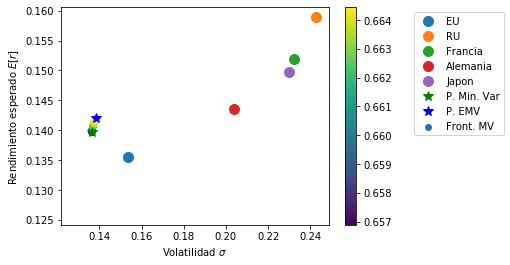

In [60]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, los activos individuales
# y los portafolios hallados
# Frontera
plt.scatter(f_mv["Vol"], f_mv["Media"], c=f_mv["rs"], label="Front. MV")
# Activos ind
for i in range(n):
    plt.plot(annual_ret_summ.iloc[1, i], 
             annual_ret_summ.iloc[0, i],
             "o",
             ms=10,
             label=annual_ret_summ.columns[i])
# Port. óptimos
plt.plot(s_minvar, e_minvar, '*g', ms=10, label="P. Min. Var")
plt.plot(s_emv, e_emv, '*b', ms=10, label="P. EMV")
# Etiquetas de los ejes
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")
plt.colorbar()
# Leyenda
plt.legend(loc="upper left", bbox_to_anchor=(1.3, 1))

**A partir de lo anterior, solo restaría construir la LAC y elegir la distribución de capital de acuerdo a las preferencias (aversión al riesgo).**
___

In [61]:
# Vector de wp variando entre 0 y 1.5 con n pasos
wp = np.linspace(0, 1.5, 101)

In [62]:
# DataFrame de CAL: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
lac = pd.DataFrame({"wp": wp,
                    "wrf": 1 - wp,
                    "Media": wp * e_emv + (1 - wp) * rf,
                    "Vol": wp * s_emv})
lac["RS"] = (lac["Media"] - rf) / lac["Vol"]

In [63]:
lac.head(10)

,wp,wrf,Media,Vol,RS
0,0.000,1.000,0.050000,0.000000,NaN
1,0.015,0.985,0.051381,0.002078,0.664438
2,0.030,0.970,0.052762,0.004157,0.664438
3,0.045,0.955,0.054143,0.006235,0.664438
4,0.060,0.940,0.055524,0.008313,0.664438
5,0.075,0.925,0.056904,0.010391,0.664438
6,0.090,0.910,0.058285,0.012470,0.664438
7,0.105,0.895,0.059666,0.014548,0.664438
8,0.120,0.880,0.061047,0.016626,0.664438
9,0.135,0.865,0.062428,0.018705,0.664438


[0.13, 0.15, 0.135, 0.145]

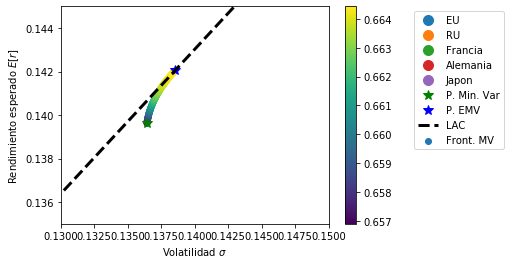

In [67]:
plt.scatter(f_mv["Vol"], f_mv["Media"], c=f_mv["rs"], label="Front. MV")
# Activos ind
for i in range(n):
    plt.plot(annual_ret_summ.iloc[1, i], 
             annual_ret_summ.iloc[0, i],
             "o",
             ms=10,
             label=annual_ret_summ.columns[i])
# Port. óptimos
plt.plot(s_minvar, e_minvar, '*g', ms=10, label="P. Min. Var")
plt.plot(s_emv, e_emv, '*b', ms=10, label="P. EMV")
# LAC
plt.plot(lac["Vol"], lac["Media"], "--k", lw=3, label="LAC")
# Etiquetas de los ejes
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")
plt.colorbar()
# Leyenda
plt.legend(loc="upper left", bbox_to_anchor=(1.3, 1))
plt.axis([0.13, 0.15, 0.135, 0.145])

In [68]:
# Para gamma=5
g = 5
w_opt = (e_emv - rf) / (g * s_emv**2)
w_opt, 1 - w_opt

(0.9591120623418227, 0.04088793765817733)

In [69]:
# Ponderaciones finales
w_opt * w_emv, 1 - w_opt

(array([0.48654864, 0.07169694, 0.02315071, 0.18219092, 0.19552485]),
 0.04088793765817733)

## 3. Comentarios finales

### 3.1. Restricciones adicionales

Los inversionistas pueden tener restricciones adicionales:
1. Restricciones en posiciones cortas.
2. Pueden requerir un rendimiento mínimo.
3. Inversión socialmente responsable: prescinden de inversiones en negocios o paises considerados éticamente o políticamente indeseables.

Todo lo anterior se puede incluir como restricciones en el problema de optimización, y puede ser llevado a cabo a costa de un cociente de Sharpe menor.

### 3.2. Críticas a la optimización media varianza
1. Solo importan medias y varianzas: recordar que la varianza subestima el riesgo en algunos casos.
2. Preferencias media-varianza tratan las ganancias y pérdidas simétricamente: el sentimiento de insatisfacción de una perdida es mayor al sentimiento de satisfacción de una ganancia (aversión a pérdidas).
3. La aversión al riesgo es constante: la actitud frente al riesgo puede cambiar, por ejemplo con el estado de la economía.
4. Horizonte corto (un periodo).
5. Basura entra - basura sale: la optimización media varianza es supremamente sensible a las entradas: estimaciones de rendimientos esperados y varianzas.
___

# Anuncios parroquiales

## 1. Quiz la próxima clase (clases 12, 13, y 14).
## 2. Revisar archivo Tarea 6.
## 3. [Nota interesante](http://yetanothermathprogrammingconsultant.blogspot.com/2016/08/portfolio-optimization-maximize-sharpe.html)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>